#**PRACTICA APRENDIZAJE SUPERVISADO**

Nicolas Vega Muñoz

* **Context:**

  A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499$ which is 999\$ on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.


* **Objective**

  The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

This data was gathered during last year's campaign.
Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

* ID - Unique ID of each customer

* Year_Birth - Age of the customer

* Complain - 1 if the customer complained in the last 2 years

* Dt_Customer - date of customer's enrollment with the company

* Education - customer's level of education

* Marital - customer's marital status

* Kidhome - number of small children in customer's household

* Teenhome - number of teenagers in customer's household

* Income - customer's yearly household income

* MntFishProducts - the amount spent on fish products in the last 2 years

* MntMeatProducts - the amount spent on meat products in the last 2 years

* MntFruits - the amount spent on fruits products in the last 2 years

* MntSweetProducts - amount spent on sweet products in the last 2 years

* MntWines - the amount spent on wine products in the last 2 years

* MntGoldProds - the amount spent on gold products in the last 2 years

* NumDealsPurchases - number of purchases made with discount

* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

* NumStorePurchases - number of purchases made directly in stores

* NumWebPurchases - number of purchases made through the company's website

* NumWebVisitsMonth - number of visits to company's website in the last month

* Recency - number of days since the last purchase



 La variable a predecir es "Response",  "1" indica que el cliente acepto la oferta y "0" que no la aceptó. Por tanto nos encontramos ante un problema de clasificacion binario, que resolveremos mediante un modelo de aprendizaje supervisado usando 4 modelos distintos: 

* KNN

*  DecisionTree
 
*  Logistic Regression 
 
* SVM



Importamos las librerias necesarias y creamos una funcion que busca el mejor modelo haciendo uso de Cross-Validation.

In [129]:
import os
import pandas as pd
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics 
#sin silenciar los warning saltan muchos mensajes diciendo que no puede ejecutar x modelo ya que los parametros 'wights' y 'metrics' estan relacionados y hay ciertas combinaciones que no funcionan.
import warnings
warnings.filterwarnings('ignore') 

comparison_df = pd.DataFrame()

models = ['KNN', 'DecisionTree', 'LogReg', 'SVM']
mat = ['precission', 'recall', 'f1-score']
# comparison_df = pd.DataFrame(index=models, columns=mat)

def create_model(X_train, y_train, model, param_grid, scoring, random=False, cv=10):
  
  if random == True:
    clf = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring)
  else:
    clf = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
  
  clf.fit(X_train,y_train)
  print("Best estimator found by grid search:")
  print(clf.best_estimator_)
  print()
  print('CV-Validation ' + str(scoring) + str(clf.best_score_))
  print()

  # Compute the train prediction according to the model
  yhatTrain = clf.predict(X_train)
  print('The train accuracy is: ' + str(accuracy_score(y_train, yhatTrain)))
  print()

  # Compute the test prediction according to the model
  yhatTest = clf.predict(X_test)
  print('The test accuracy is: ' + str(accuracy_score(y_test, yhatTest)))
  print()

  #Print test confusion matrix
  print('----------------Test Confusion Matrix------------------')
  print(confusion_matrix(y_test,yhatTest))
  print(classification_report(y_test,yhatTest))
  
  #Print performance metrics using sklearn.metrics package
  print("Train accuracy",metrics.accuracy_score(y_train, yhatTrain))
  print("Test accuracy",metrics.accuracy_score(y_test, yhatTest))
  print()
  print("Train Precision",metrics.precision_score(y_train, yhatTrain))
  print("Test Precision",metrics.precision_score(y_test, yhatTest))
  print()
  print("Train Recall",metrics.recall_score(y_train, yhatTrain))
  print("Test Recall",metrics.recall_score(y_test, yhatTest))
  print()
  print("Train F1",metrics.f1_score(y_train, yhatTrain))
  print("Test F1",metrics.f1_score(y_test, yhatTest))

  if isinstance(model, type(DecisionTreeClassifier())):
    print(50*'-')
    model = clf.best_estimator_
    fig, ax = plt.subplots(figsize=(100, 25))
    print(f"Profundidad del árbol: {model.get_depth()}")
    print(f"Número de nodos terminales: {model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = model,
                feature_names = X.columns,
                class_names   = ['0', '1'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 2,
                ax            = ax
          )
    
  return classification_report(y_test, yhatTest, output_dict=True), clf.best_estimator_ 

    

#**PREPROCESSING**

  Vemos que tenemos 2240 casos y 22 columnas. Tan solo hay una columna con nulos (Income).

  La mayoria de las variables son numericas, salvo: "Education", "Marital_status" y "Dt_Customer". Tendremos que estudiar que hacer con estas variables para que tomen valores numericos.

In [130]:

df = pd.read_csv('superstore_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

  Vemos que tan solo el 14,91% de los casos corresponden a la clase positiva, esto hara que en el modelo haya overfitting de los valores negativos.

 Trataremos de solventarlo a la hora de establecer la metrica al hacer CV para que maximice el valor de f1.

In [131]:
pos = df['Response'].value_counts()[1]
neg = df['Response'].value_counts()[0]
print('prop_pos = ' +  str(pos/(neg+pos)))

prop_pos = 0.14910714285714285


Observamos que hay 24 valores ausentes en la variable 'Income'. Observamos las entradas que tienen estos valores ausentes y vemos que el resto de valores parecen ser reales y con sentido. A pesar de ser una proporcion pequeña dentro de nuestro numero de observaciones, vamos a tratar de imputar los valores en vez de suprimir estas filas.

In [132]:
print(df.isnull().sum())
df[df.isna().any(axis=1)]


Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2/3/2014,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,1/4/2013,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,12/1/2014,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,5/18/2013,52,375,...,94,66,96,7,4,10,4,3,0,0


Vemos que valores tienen las columnas de tipo 'object', vemos que son de tipo string y date.

In [133]:
print(df.select_dtypes('object'))

       Education Marital_Status Dt_Customer
0     Graduation       Divorced   6/16/2014
1     Graduation         Single   6/15/2014
2     Graduation        Married   5/13/2014
3     Graduation       Together   11/5/2014
4     Graduation         Single    8/4/2014
...          ...            ...         ...
2235         PhD       Divorced    7/3/2013
2236    2n Cycle        Married   1/22/2013
2237  Graduation       Divorced   3/12/2012
2238  Graduation        Married  11/29/2012
2239         PhD        Married    1/9/2012

[2240 rows x 3 columns]


Vemos los posibles valores de la variable "Education" y verificamos que son correctos.

In [134]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

Vemos los posibles valores de la variable "Marital_Status" y observamos que hay valores incorrectos ('YOLO', 'Alone', 'Absurd'). A YOLO y Alone los establecemos como 'single', y a 'Absurd' como nulo. Posteriormente haremos One-Hot-Encodign y el 'Absurd' se codificara como 0´s

In [135]:
print(df.Marital_Status.unique())
#igual dejar yolo y together fuera al no saber con certeza a q se refiere, luego al hacer dummies seran 0 0 0 esos
map = {'Together': 'Married', 'YOLO': 'Single', 'Alone': 'Single', 'Absurd': NA }
df.Marital_Status.replace(map, inplace=True)


['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


Una vez ya hemos corregido los posibles valores de las variables categoricas procedemos a crear Dummies.

In [136]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

Procedemos a modificar ciertas variables para que tengan más sentido de cara al modelo:

- En vez de tener una varibale con la fecha en la que el cliente se dio de alta tendremos una con la antiguedad en años del cliente.

- En vez de tener la fecha de nacimiento del cliente tendremos una variable que corresponda a la edad.

In [137]:
import datetime
today = datetime.date.today()
year = today.year

df['Age'] = year - df['Year_Birth']
df['year_customer'] = year - pd.DatetimeIndex(df['Dt_Customer']).year


Eliminamos las columnas no necesarias

In [138]:
df.drop(columns=['Id', 'Dt_Customer', 'Year_Birth'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2216 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

Con "describe" vemos informacion sobre los valores que toman las variables. Vemos que todas parecen tener valores reales salvo en la variable "Age", en la que vemos que la edad maxima son 130 años, imposible. Por tanto vemos las filas que tienen una edad considerable (mayores que 100 por ejemplo) y vemos que hacer con dichos valores.

Vemos que las edades son de 123, 126 y 130 años, valores surrealistas. Sin embargo el resto de valores de dichas filas tiene sentido, por tanto haremos uso de KNN Imputer.

In [139]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())
    print(df[df['Age']>100])



              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354     0.444196     0.506250    49.109375   303.935714   
std     25173.076661     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68522.000000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000 

Imputamos los valores de aquellos nulos en las variables "Income" y "Age"

In [140]:
from sklearn.impute import KNNImputer
df.loc[df['Age']>100, 'Age' ] = NA

imputer = KNNImputer(n_neighbors=5, weights="distance", copy=False)
df['Age'] = imputer.fit_transform(df)
df['Income'] = imputer.fit_transform(df)



Creamos 3 variables más que considero que podrian ser relevantes:

* total_spent: valor total gastado (suma de vinos, frutas, carne, pescado, dulces y oro).

* deals_ratio: proporcion de compras en las que se ha usado algun tipo de descuento.

* spent_ratio: proporcion de dinero gastado en tienda en comparacion con los ingresos del cliente.


In [141]:
df['total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['deals_ratio'] = df['NumDealsPurchases']/(df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
df['spent_ratio'] = df['Income']/df['total_spent']

Vemos que hay algunos valores en "deals_ratio" que son nulos, esto es porque ha habido una division entre 0, por lo que establecemos esos nulos a 0 (el denominador igual a 0 indica que no ha habido compras por los medios de dichas variables).

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

In [143]:
df.fillna(0, axis=1, inplace=True)

In [144]:
from sklearn.model_selection import train_test_split
df2 = df.copy()
X = df2.drop(columns='Response')
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [145]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#**KNN**

En cuanto a los parametros que usaremos a la hora de hacer cross-validation destacan 2 que vamos a mantener constantes:

 - cv=10: esta respaldado teorica y empiricamente que generalmente da buenos resultados, aun asi hemos comprobado con otros valores y la mejora era nula.
 - scoring='f1_macro': como hemos comentado previamente tenemos un dataset muy desbalanceado, por tanto debemos penalizar tanto la precision como el recall. Esto se logra en la metrica f1 pues es una media harmonica de las 2, y establecemos que sea la "macro" puesto que realmente la que queremos aumentar todo lo posible sera el f1 de la etiqueta 0, pero tampoco queremos que el modelo deje de acertar al asignar etiqueta "1".

In [146]:


k_range = list(range(1, 21))
param_grid = {'n_neighbors': k_range,
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'cosine', 'l2', 'haversine']
              }

model = neighbors.KNeighborsClassifier()
scoring = 'f1_macro'

##**GridSearchCV**

In [147]:
KNN_Grid, KNN_Grid_model = create_model(X_train, y_train, model, param_grid, scoring)
comparison_df = pd.concat([comparison_df,pd.DataFrame(KNN_Grid['1'], index =['KNN_Grid'])]) 

Best estimator found by grid search:
KNeighborsClassifier(metric='cosine', n_neighbors=4, weights='distance')

CV-Validation f1_macro0.6786421826496378

The train accuracy is: 0.9949776785714286

The test accuracy is: 0.84375

----------------Test Confusion Matrix------------------
[[359  22]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       381
           1       0.46      0.28      0.35        67

    accuracy                           0.84       448
   macro avg       0.67      0.61      0.63       448
weighted avg       0.82      0.84      0.83       448

Train accuracy 0.9949776785714286
Test accuracy 0.84375

Train Precision 1.0
Test Precision 0.4634146341463415

Train Recall 0.9662921348314607
Test Recall 0.2835820895522388

Train F1 0.9828571428571428
Test F1 0.35185185185185186


##**RandomizedSearchCV**

In [148]:
KNN_Rand, KNN_Rand_model = create_model(X_train, y_train, model, param_grid, scoring, random=True)
comparison_df = pd.concat([comparison_df,pd.DataFrame(KNN_Rand['1'], index =['KNN_Rand'])]) 

Best estimator found by grid search:
KNeighborsClassifier(metric='l1', n_neighbors=2, weights='distance')

CV-Validation f1_macro0.6636132016812033

The train accuracy is: 0.9933035714285714

The test accuracy is: 0.84375

----------------Test Confusion Matrix------------------
[[354  27]
 [ 43  24]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       381
           1       0.47      0.36      0.41        67

    accuracy                           0.84       448
   macro avg       0.68      0.64      0.66       448
weighted avg       0.83      0.84      0.83       448

Train accuracy 0.9933035714285714
Test accuracy 0.84375

Train Precision 1.0
Test Precision 0.47058823529411764

Train Recall 0.9550561797752809
Test Recall 0.3582089552238806

Train F1 0.9770114942528736
Test F1 0.4067796610169491


# **DECISSION TREE**





A la hora de elegir el parametro "max_depth" antes usaba valores de 0 a 100, pero la interpretabilidad del arbol era muy compleja. Ademas, el valor del modelo que salia era con tan solo 10 niveles, por lo que rebaje el numero de niveles a 10 y seguia obteniendo el mismo modelo. Al seguir siendo la intepretabilidad del arbol muy compleja he probado a limitarlo a 5 niveles, y curiosamente obtengo un modelo que parece ser mejor que los anteriores (a pesar de que ya estuviese contenido el valor de dicho parametro en los anteriores ejemplos). Supongo que esto es debido a que se producia overfitting, dando un error menor al real, obteniendo un valor mas bajo del esperado en el test set. 

 

In [149]:
#Define parameters of the decision tree to be checked with cross-validation
param_grid = {'min_samples_leaf': [5, 7, 10],
              'min_samples_split': [5, 10, 20],
              'max_depth':list(range(1, 5)),
              'criterion':['entropy','gini'],
              'ccp_alpha': [0]}

model = DecisionTreeClassifier()
scoring='f1_macro'

##**GridSearchCV**

Con tan solo 4 niveles podemos interpretar facilmente el arbol, sin embargo los datos han sido previamente estandarizados, por lo que no podemos ver exactamente a que valores reales corresponderian, tan solo podemos interpretar los valores que vemos sabiendo que han sido estandarizados (se distribuyen segun una normal de media 0 y desviacion tipica 1):

- Vemos que la variable que mas informacion da es "total_spent":
 - en caso de que sea menor que 0.92 (0.92 correspondera a un valor superior a la media) se le asignara etiqueta 0 salvo el caso en el que la variable "year_customer" sea mayor que 0.78, "deals_ratio" menor que 0.71 e "income" mayor que 1.16, en el que obtendria etiqueta "1". Lo que me parece contrario a la logica es la segmentacion que hace en "deals_ratio", asignando etiqueta positiva (acepta la nueva oferta) a aquellos clientes que a parte de las condiciones expuestas anteriormente, ademas, tenga un ratio de compras con descuento menor que un valor.

 - en el caso de que sea mayor a 0.92 (valores superiores a la media) 
    - si "recency" es menor que -0.3 (valores ligeramente inferiores a la media) habria que observar el valor de "NumCatalogPurchases".
      - si es menor que 1.11 y la variable "teenhome" es menor que 0 (tiene menos adolescentes en casa que la media) se le asignara la etiqueta "1"
      - si es mayor que 1.11 y "Age" es mayor que 1.44 (tiene una edad notablemente superior a la media) recibira la etiqueta "1".

    - si "recency" es menor a -0.3 (la ultima compra es mas reciente que la media), "Age" es mayor a 1.57, y "NumWebVisits" mayor que -1.56 (visitan mas veces la web que cierta gente pese a poder visitarla menos veces que la media) recibira la etiqueta "1"


Best estimator found by grid search:
DecisionTreeClassifier(ccp_alpha=0, max_depth=4, min_samples_leaf=5,
                       min_samples_split=20)

CV-Validation f1_macro0.5939346098033237

The train accuracy is: 0.8766741071428571

The test accuracy is: 0.8236607142857143

----------------Test Confusion Matrix------------------
[[352  29]
 [ 50  17]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       381
           1       0.37      0.25      0.30        67

    accuracy                           0.82       448
   macro avg       0.62      0.59      0.60       448
weighted avg       0.80      0.82      0.81       448

Train accuracy 0.8766741071428571
Test accuracy 0.8236607142857143

Train Precision 0.6513157894736842
Test Precision 0.3695652173913043

Train Recall 0.3707865168539326
Test Recall 0.2537313432835821

Train F1 0.4725536992840095
Test F1 0.3008849557522124
--------------------------------------------------
Profund

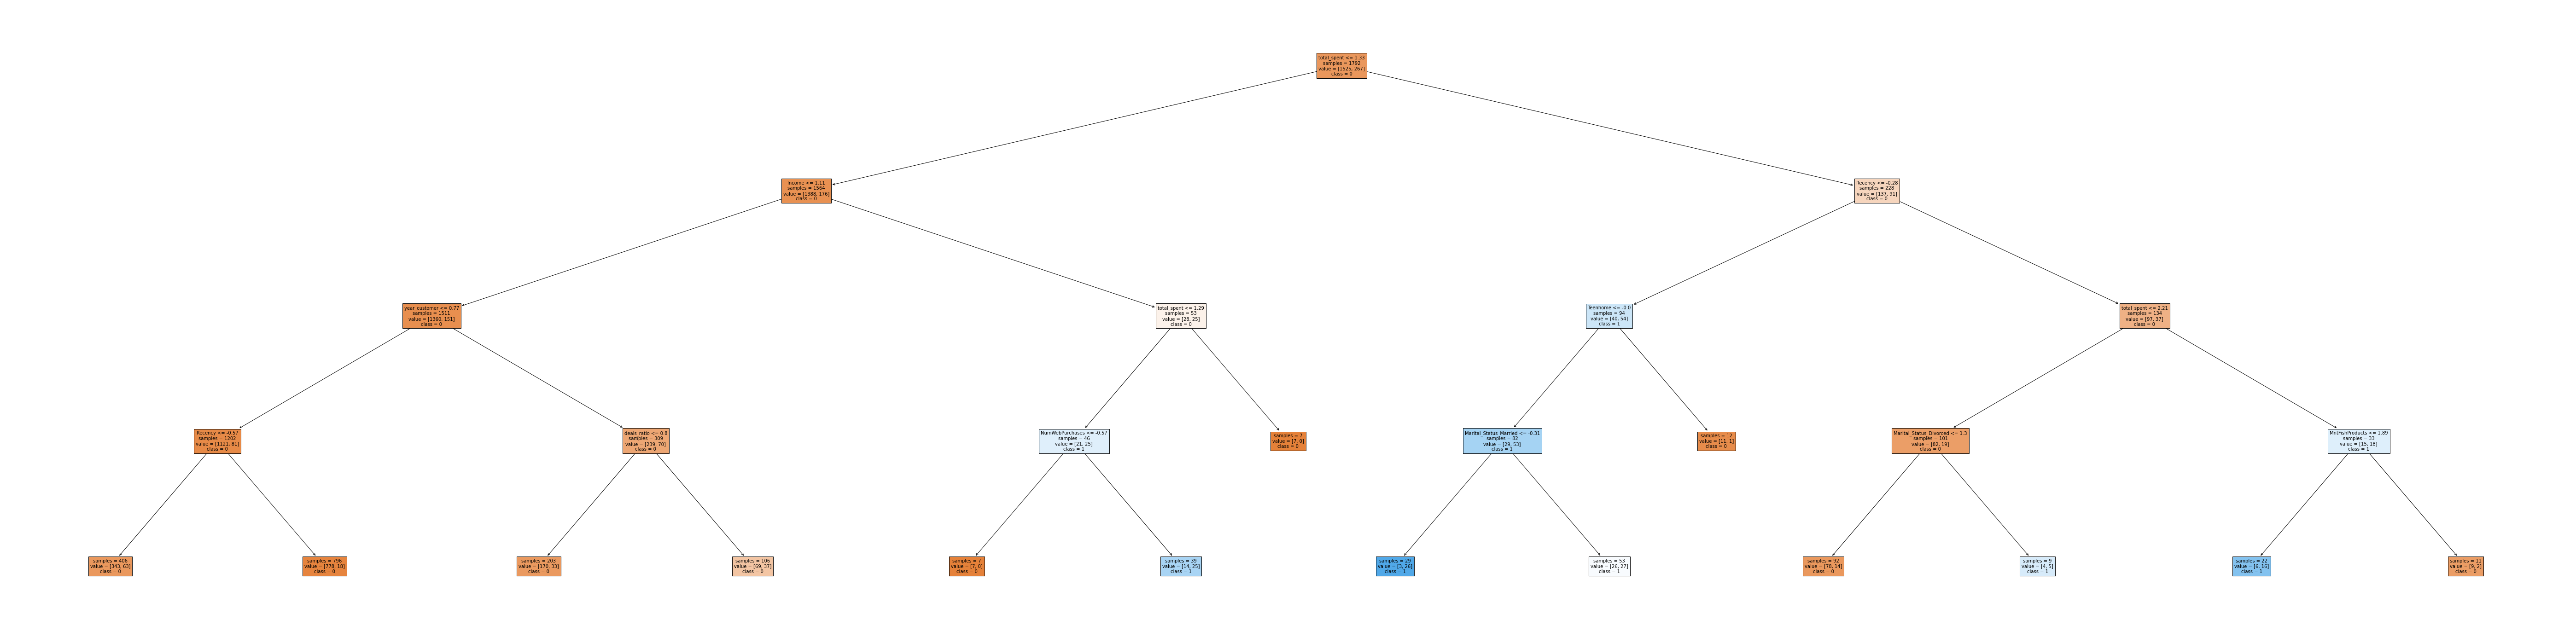

In [150]:
Dec_Tree_Grid, Dec_Tree_Grid_model = create_model(X_train, y_train, model, param_grid, scoring)
comparison_df = pd.concat([comparison_df,pd.DataFrame(Dec_Tree_Grid['1'], index =['Dec_Tree_Grid'])]) 

##**RandomizedSearchCV**

La interpretacion del arbol es analoga al ejemplo anterior.

Best estimator found by grid search:
DecisionTreeClassifier(ccp_alpha=0, max_depth=4, min_samples_leaf=5,
                       min_samples_split=20)

CV-Validation f1_macro0.5932510663086347

The train accuracy is: 0.8766741071428571

The test accuracy is: 0.8236607142857143

----------------Test Confusion Matrix------------------
[[352  29]
 [ 50  17]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       381
           1       0.37      0.25      0.30        67

    accuracy                           0.82       448
   macro avg       0.62      0.59      0.60       448
weighted avg       0.80      0.82      0.81       448

Train accuracy 0.8766741071428571
Test accuracy 0.8236607142857143

Train Precision 0.6513157894736842
Test Precision 0.3695652173913043

Train Recall 0.3707865168539326
Test Recall 0.2537313432835821

Train F1 0.4725536992840095
Test F1 0.3008849557522124
--------------------------------------------------
Profund

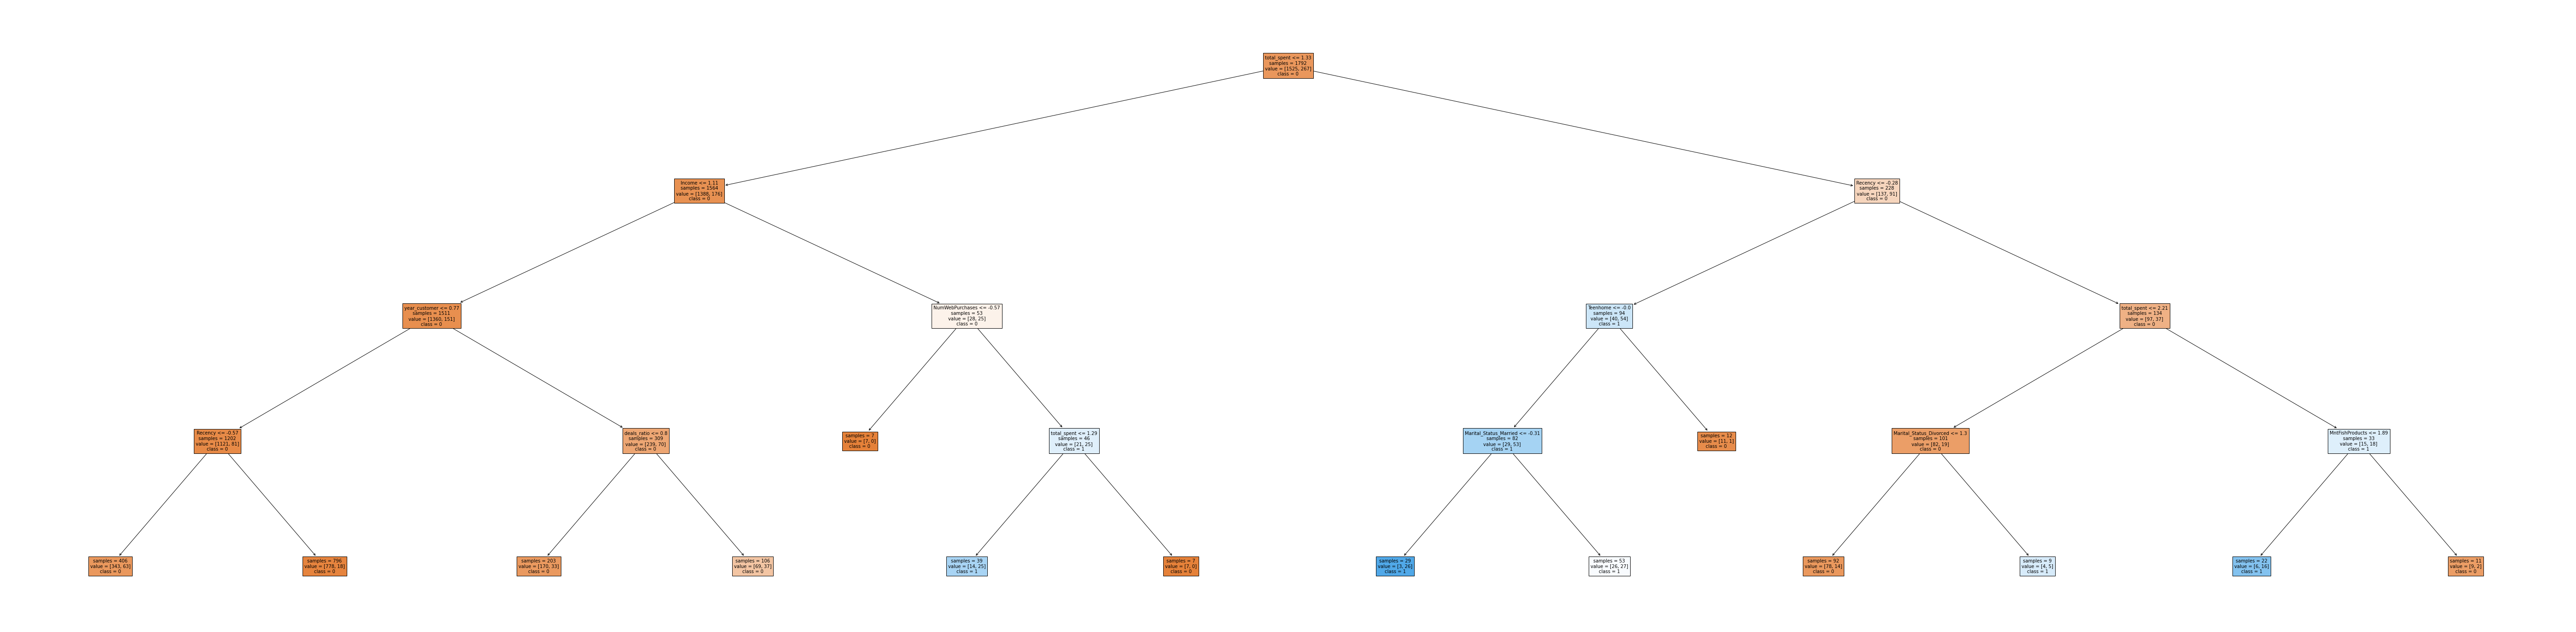

In [151]:
Dec_Tree_Rand, Dec_Tree_Rand_model = create_model(X_train, y_train, model, param_grid, scoring, random=True)
comparison_df = pd.concat([comparison_df,pd.DataFrame(Dec_Tree_Rand['1'], index =['Dec_Tree_Rand'])]) 

#**LOGISTIC REGRESSION**

In [152]:
#Define parameters of the decision tree to be checked with cross-validation
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'dual': [True, False],
              'solver':['sag','saga','newton-cholesky']
              }

model = LogisticRegression()
scoring='f1_macro'

##**GridSearchCV**

In [153]:
LogReg_Grid, LogReg_Grid_model = create_model(X_train, y_train, model, param_grid, scoring)
comparison_df = pd.concat([comparison_df,pd.DataFrame(LogReg_Grid['1'], index =['LogReg_Grid'])]) 

Best estimator found by grid search:
LogisticRegression(solver='sag')

CV-Validation f1_macro0.6743901069842237

The train accuracy is: 0.8783482142857143

The test accuracy is: 0.8571428571428571

----------------Test Confusion Matrix------------------
[[362  19]
 [ 45  22]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       381
           1       0.54      0.33      0.41        67

    accuracy                           0.86       448
   macro avg       0.71      0.64      0.66       448
weighted avg       0.84      0.86      0.84       448

Train accuracy 0.8783482142857143
Test accuracy 0.8571428571428571

Train Precision 0.6737588652482269
Test Precision 0.5365853658536586

Train Recall 0.35580524344569286
Test Recall 0.3283582089552239

Train F1 0.4656862745098039
Test F1 0.40740740740740744


##**RandomizedSearchCV**

In [154]:
LogReg_Rand, LogReg_Rand_model = create_model(X_train, y_train, model, param_grid, scoring, random=True)
comparison_df = pd.concat([comparison_df,pd.DataFrame(LogReg_Rand['1'], index =['LogReg_Rand'])]) 

Best estimator found by grid search:
LogisticRegression(solver='sag')

CV-Validation f1_macro0.6743901069842237

The train accuracy is: 0.8783482142857143

The test accuracy is: 0.8571428571428571

----------------Test Confusion Matrix------------------
[[362  19]
 [ 45  22]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       381
           1       0.54      0.33      0.41        67

    accuracy                           0.86       448
   macro avg       0.71      0.64      0.66       448
weighted avg       0.84      0.86      0.84       448

Train accuracy 0.8783482142857143
Test accuracy 0.8571428571428571

Train Precision 0.6737588652482269
Test Precision 0.5365853658536586

Train Recall 0.35580524344569286
Test Recall 0.3283582089552239

Train F1 0.4656862745098039
Test F1 0.40740740740740744


#**SVM**

In [155]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
model = svm.SVC()
scoring='f1_macro'


##**GridSearchCV**


In [156]:
SVM_Grid, SVM_Grid_model = create_model(X_train, y_train, model, param_grid, scoring)
comparison_df = pd.concat([comparison_df,pd.DataFrame(SVM_Grid['1'], index =['SVM_Grid'])]) 

Best estimator found by grid search:
SVC(kernel='linear')

CV-Validation f1_macro0.6544215873571606

The train accuracy is: 0.8822544642857143

The test accuracy is: 0.8571428571428571

----------------Test Confusion Matrix------------------
[[369  12]
 [ 52  15]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       381
           1       0.56      0.22      0.32        67

    accuracy                           0.86       448
   macro avg       0.72      0.60      0.62       448
weighted avg       0.83      0.86      0.83       448

Train accuracy 0.8822544642857143
Test accuracy 0.8571428571428571

Train Precision 0.7857142857142857
Test Precision 0.5555555555555556

Train Recall 0.2883895131086142
Test Recall 0.22388059701492538

Train F1 0.42191780821917807
Test F1 0.3191489361702128


##**RandomizedSearchCV**

In [157]:
SVM_Rand, SVM_Rand_model = create_model(X_train, y_train, model, param_grid, scoring, random=True)
comparison_df = pd.concat([comparison_df,pd.DataFrame(SVM_Rand['1'], index =['SVM_Rand'])]) 

Best estimator found by grid search:
SVC(kernel='linear')

CV-Validation f1_macro0.6544215873571606

The train accuracy is: 0.8822544642857143

The test accuracy is: 0.8571428571428571

----------------Test Confusion Matrix------------------
[[369  12]
 [ 52  15]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       381
           1       0.56      0.22      0.32        67

    accuracy                           0.86       448
   macro avg       0.72      0.60      0.62       448
weighted avg       0.83      0.86      0.83       448

Train accuracy 0.8822544642857143
Test accuracy 0.8571428571428571

Train Precision 0.7857142857142857
Test Precision 0.5555555555555556

Train Recall 0.2883895131086142
Test Recall 0.22388059701492538

Train F1 0.42191780821917807
Test F1 0.3191489361702128


# **COMPARACION MODELOS**

En la siguiente tabla podemos ver las metricas asociadas a la clase "1". El resto de metricas correspondientes a la clase "0" no nos interesan pues seran valores altos ya que estan muy desbalanceadas las clases. Como el modelo en la mayoria de casos apostara por que la clase correcta sea "0", y la mayoria de casos pertenecen a la clase "0", las metricas seran de esta clase seran altas, dando una falsa sensacion de acierto del modelo.

Observamos ejecutando todos los algoritmos en varias ocasiones que los modelos en general no dan resultados muy distintos, aun asi podemos ver que hay modelos ligeramente mejores que otros. 

Como podemos ver el "recall" es muy bajo siempre debido al desbalanceo entre clases, tan solo identificamos como positivos aproximadamente el 30% del total. Además la precision es de un 50% de media, significando que de todos los casos que identificamos como positivos, tan solo la mitad lo son realmente. Se puede concluir que el modelo esta sesgado a etiquetar como negativo.

En cuanto al "mejor modelo" es dificil elegir uno a ciencia cierta. Diremos que un modelo es mejor que otro si su valor f1 es mayor que el del otro. Esto lo hacemos asi pues f1 es una media armonica de "precission" y "recall", penalizando ambos por igual. Por tanto, podemos decir que los mejores modelos serian:

- Logistic Regression

- KNN (la version Grid parece dar mejores resultados que la version Random por algun motivo)

- Decision Tree 

In [158]:
comparison_df

,precision,recall,f1-score,support
KNN_Grid,0.463415,0.283582,0.351852,67
KNN_Rand,0.470588,0.358209,0.406780,67
Dec_Tree_Grid,0.369565,0.253731,0.300885,67
Dec_Tree_Rand,0.369565,0.253731,0.300885,67
LogReg_Grid,0.536585,0.328358,0.407407,67
LogReg_Rand,0.536585,0.328358,0.407407,67
SVM_Grid,0.555556,0.223881,0.319149,67
SVM_Rand,0.555556,0.223881,0.319149,67


En base a los resultados anteriores y a distintas ejecuciones de cada modelo, y en vista a que solo podemos elegir un modelo, elegiremos como mejor modelo el generado por Logistic Regression (grid o random, los resultados suelen ser iguales) al tener el mayor valor de "f1", a pesar de no ser muy alto tampoco. 

Visualizamos cual es el mejor modelo hallado tras hacer cross-validation probando con distintos parametros (lo dejamos automatizado, puede ser que haya un caso concreto en el que Logistic Regression no sea el mejor modelo, pero generalmente lo será)

In [159]:
best_model =  comparison_df[['f1-score']].idxmax()[0] + '_model'
print(f'El mejor modelo es: {globals()[best_model]}')

El mejor modelo es: LogisticRegression(solver='sag')
